In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [7]:
!kaggle datasets download -d alxmamaev/flowers-recognition

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip /content/flowers-recognition.zip

Archive:  /content/flowers-recognition.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.

In [9]:
# import the nececessary lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# data augmentation for the training variable
train_datagen = ImageDataGenerator(rescale =1./255,zoom_range=0.2,horizontal_flip = True)

In [11]:
# data augmentation for the testing variable
test_datagen = ImageDataGenerator(rescale =1./255)

In [38]:
# data augmentation on the training data
x_train = train_datagen.flow_from_directory('/content/flowers',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)

Found 4317 images belonging to 5 classes.


In [39]:
# data augmentation on the testing data
x_test = test_datagen.flow_from_directory('/content/flowers',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)


Found 4317 images belonging to 5 classes.


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten,Dense

In [44]:

# adding layers

model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))  #convolution layer
model.add(MaxPooling2D(pool_size =(2,2)))  # maxpooling layer
model.add(Flatten())  # flatten layer

model.add(Dense(300,activation ='relu')) # hidden layer 1
model.add(Dense(150,activation ='relu')) # hidden layer 2

model.add(Dense(5,activation ='softmax')) # output layer

In [45]:
# compile the model
model.compile(optimizer = 'adam',loss= 'categorical_crossentropy',metrics =['accuracy'])

In [47]:
# training the model

model.fit_generator(x_train,steps_per_epoch= len(x_train),epochs = 10,validation_data = x_test,validation_steps = len(x_test))


<ipython-input-47-095802609afe>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch= len(x_train),epochs = 10,validation_data = x_test,validation_steps = len(x_test))


Epoch 1/10
44/44 [==============================] - 45s 1s/step - loss: 0.7850 - accuracy: 0.7021 - val_loss: 0.8195 - val_accuracy: 0.6952
Epoch 2/10
44/44 [==============================] - 44s 992ms/step - loss: 0.7397 - accuracy: 0.7195 - val_loss: 0.7430 - val_accuracy: 0.7304
Epoch 3/10
44/44 [==============================] - 43s 981ms/step - loss: 0.7233 - accuracy: 0.7248 - val_loss: 0.7423 - val_accuracy: 0.7146
Epoch 4/10
44/44 [==============================] - 43s 983ms/step - loss: 0.6877 - accuracy: 0.7426 - val_loss: 0.6603 - val_accuracy: 0.7542
Epoch 5/10
44/44 [==============================] - 54s 1s/step - loss: 0.6548 - accuracy: 0.7519 - val_loss: 0.6791 - val_accuracy: 0.7501
Epoch 6/10
44/44 [==============================] - 54s 1s/step - loss: 0.6408 - accuracy: 0.7586 - val_loss: 0.5657 - val_accuracy: 0.7941
Epoch 7/10
44/44 [==============================] - 43s 976ms/step - loss: 0.6021 - accuracy: 0.7702 - val_loss: 0.5924 - val_accuracy: 0.7751
Epoch 8/

In [48]:
# save the model

model.save('flower.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [53]:
# testing 1

img = image.load_img('/content/flowers/daisy/102841525_bd6628ae3c.jpg',target_size =(64,64))

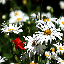

In [54]:
img

In [55]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 39ms/step


'daisy'

In [80]:
# testing 2
img = image.load_img('/content/flowers/dandelion/1128626197_3f52424215_n.jpg',target_size =(64,64))


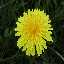

In [81]:
img

In [82]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 34ms/step


'dandelion'

In [89]:
#testing 3
img = image.load_img('/content/flowers/rose/11233672494_d8bf0a3dbf_n.jpg',target_size =(64,64))

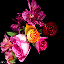

In [90]:
img

In [91]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 36ms/step


'rose'

In [98]:
#testing 4
img = image.load_img('/content/flowers/sunflower/1022552036_67d33d5bd8_n.jpg',target_size =(64,64))

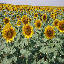

In [99]:
img

In [100]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 30ms/step


'sunflower'

In [105]:
#testing 5
img = image.load_img('/content/flowers/tulip/10686568196_b1915544a8.jpg',target_size =(64,64))

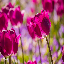

In [106]:
img

In [107]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 81ms/step


'tulip'

In [109]:
#testing 5
img1 = image.load_img('/content/tulip.jpg',target_size =(64,64))

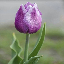

In [110]:
img1

In [111]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 33ms/step


'tulip'